# ADS Homework #1
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 1, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - Probability (30 points)

Let's look at some basic probability simulations and how Python can be used as a tool to generate and evaluate probabilistic events.

**1.1)** Use the *numpy* or *random* library to generate a pair of six-sided dice. Simulate 100,000 roles of the dice, adding the two numbers together. Plot a histogram of the counts for each sum recorded. Caption the figure with any observations you may have (be sure to include a title); if you are unsure, make an educated gauss... er, I mean guess. (10 points)

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
random.seed(42)
%matplotlib inline

In [54]:
d1 = np.random.random_integers(1, 6, 100000)
d2 = np.random.random_integers(1, 6, 100000)
dsums = d1 + d2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  from ipykernel import kernelapp as app


In [55]:
dsums

array([4, 7, 5, ..., 6, 6, 7])

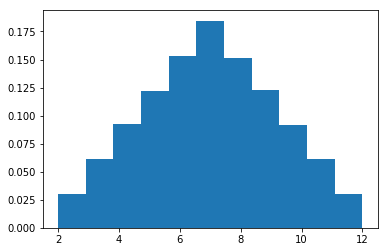

In [56]:
count, bins, ignored = plt.hist(dsums, 11, normed=True)
plt.show()

**1.2)** Using *x* and *y* provided below, plot the data and answer the following questions. (20 points total)

In [57]:
x = range(20)
y = [14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
     55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

(a) Calculate corr(x,y) and provide a brief description of what this tells us. (5 points)

In [58]:
X = np.array(x)
Y = np.array(y)
XY = X * Y

correlation_XY = (np.mean(XY) - np.mean(X) * np.mean(Y)) / ( np.std(X) * np.std(Y) )
print("corr(x,y) = {}".format(correlation_XY))

corr(x,y) = 0.956301005112


this means y and x are highly correlated

(b) Generate a scatter plot of the data. Be sure to include a title and caption. (5 points)

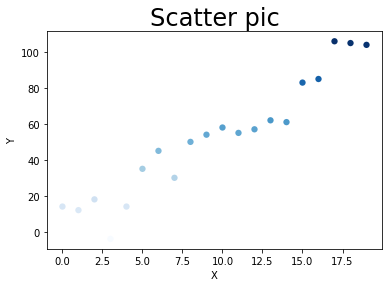

In [59]:
plt.scatter(x,y,c=y,cmap=plt.cm.Blues,edgecolors='none',s=40)

plt.title("Scatter pic",fontsize=24)
plt.xlabel("X",fontsize=10)
plt.ylabel("Y",fontsize=10)

(c) There's obviously some linear correlation going on here... using the *statsmodels* or *sklearn* libraries, fit a line to the data and plot this on the scatter plot generated in *b*. In the caption, be sure to discuss the R-squared value for the fit. (10 points)

In [60]:
df = pd.DataFrame([X,Y,XY]).T
df.columns = ["x","y","xy"]
df.loc[:,"x_sqr"]=df.x*df.x

w1=(df.xy.sum()-df.y.sum()*df.x.sum()/len(df))/(df.x_sqr.sum()-df.x.sum()*df.x.sum()/len(df))
print("w1 is : {}".format(w1))

w0=(df.y-df.x*w1).mean()
print("w0 is : {}".format(w0))

df.loc[:,"pred"]=w1*df.x+w0
df.loc[:,"err"]=df.y-df.pred

R_2=1-(df.err**2).sum()/((df.y-df.y.mean())**2).sum()
print("R_2 is : {}".format(R_2))

w1 is : 5.28872180451
w0 is : 1.95714285714
R_2 is : 0.914511612377


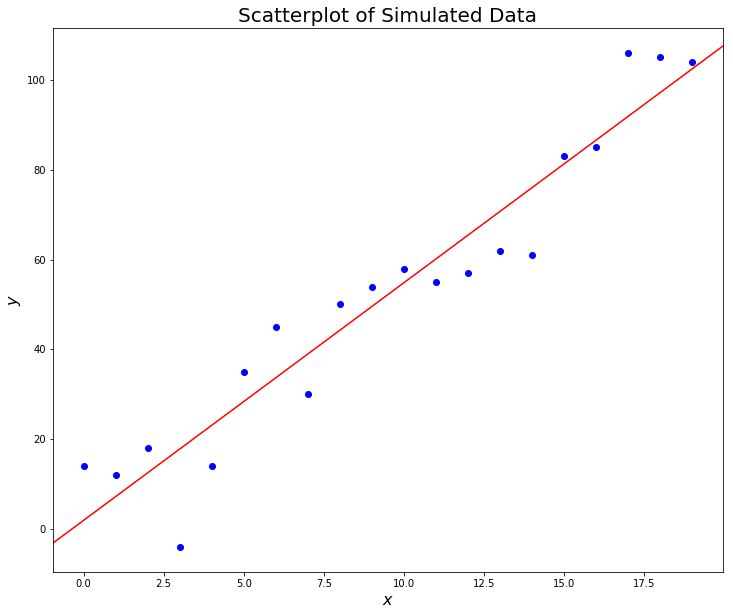

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import pandas as pd

x = pd.DataFrame(x)
y = pd.DataFrame(y)
data = pd.merge(x, y, left_index=True, right_index=True)
data.rename(columns={'X':'x', 'Y':'y'}, inplace=True)

figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, c='b')
lm = smf.ols(formula='y ~ x', data = df).fit()
abline_plot(model_results=lm, ax=ax, color='red')

plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

### Problem 2 (35 Points)

You are staring out the window from the 13th story of CUSP, looking on as people bustle about Jay Street; some head to the subway, others wait in line for street food, and yet others seem to wander around aimlessly. You don't know or care about what they are doing or where they are going. The one thing that you do know for certain is that none of them were born on a leap-day (February 29th). You also have recently found a dataset on subway ridership in NYC in which people have self-reported their birthdays. 

Because you are a data scientist, you begin to wonder... 'What is the likelihood that any one of them shares my birthday?' Knowing that, due to a variety of reasons, real-life births are not evenly distributed throughout the year, you decide to dig into the dataset to see if you can uncover trends in what time of year people are born. The dataset, unfortunately is a little messy, due to a poor user-interface, but with a bit of cleaning, should be fine to use. Let's take a closer look at the 'births.csv' dataset.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

birthdays = pd.read_csv('birthdays.csv') # make sure file is in same folder as notebook
birthdays.index = birthdays.index + 1   
birthdays.index.name = 'day_of_year'

birthdays.head(65)

,month,day,births,subway_ridership
day_of_year,,,,
1,1,1,160369,46.763549
2,1,2,169896,38.745642
3,1,3,180036,42.628351
4,1,4,182854,38.160858
5,1,5,184145,2.195034
6,1,6,186726,16.720587
7,1,7,188277,5.829813
8,1,8,185186,45.891352
9,1,9,181511,14.486921


* **'day_of_year'** describes the day of the year from January 1. <br>
* **'births'** describes the number of births that users registered for a given date <br>
* **'subway_ridership'** describes the average reported subway ridership (rides/month) for people born on that day.

2.1) First plot the birthday data (ignore subway ridership for now) and see if there are any patterns. If so, what are they? Include a description below your plot describing your observations and possible explainations - these observations can just be hypotheses, and do not have to be correct. (10 points)

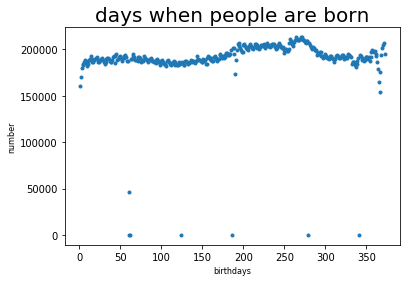

In [63]:
plt.plot(birthdays.index,birthdays.births,'.')
plt.title('days when people are born', fontsize=20)
plt.ylabel('number', fontsize=8)
plt.xlabel('birthdays', fontsize=8)

in September when the weather is cool birth rate is high

2.2) You should notice an issue in the data that you have plotted. Taking a glance at the raw datapoints should provide the answer. Please make note of what the issue is, and print the first 65 rows of a cleaned-up dataset. (15 points)

In [64]:
birthdays_2 = pd.read_csv('birthdays.csv')
birthdays_2 = birthdays_2.dropna(axis=0,how="any")
birthdays_2.head()

,month,day,births,subway_ridership
0,1,1,160369,46.763549
1,1,2,169896,38.745642
2,1,3,180036,42.628351
3,1,4,182854,38.160858
4,1,5,184145,2.195034


In [65]:
#the issue is that Feb 29,30,31 and April 31 etc are recorded
birthdays_2 = birthdays_2[( birthdays_2 != 98).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 != 77).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 !=128).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 !=125).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 !=201).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 !=215).all(axis = 1)]
birthdays_2 = birthdays_2[( birthdays_2 !=46420).all(axis = 1)]
birthdays_2.head(65)

,month,day,births,subway_ridership
0,1,1,160369,46.763549
1,1,2,169896,38.745642
2,1,3,180036,42.628351
3,1,4,182854,38.160858
4,1,5,184145,2.195034
5,1,6,186726,16.720587
6,1,7,188277,5.829813
7,1,8,185186,45.891352
8,1,9,181511,14.486921
9,1,10,183668,12.736874


3.3) Plot the data again, and use the 'sort_values' method to examine high and low points. Do you notice anything about overall trends in births by time of year? Do any specific dates stand out? (10 points)

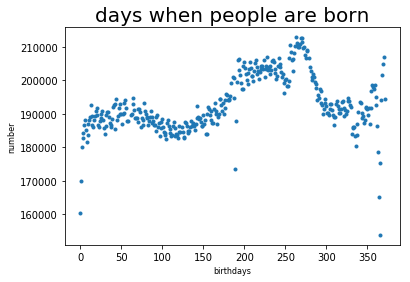

In [66]:
plt.plot(birthdays_2.index,birthdays_2.births,'.')
plt.title('days when people are born', fontsize=20)
plt.ylabel('number', fontsize=8)
plt.xlabel('birthdays', fontsize=8)

few people are born in winter
specific data: in early January and late December birth rate is very low

### Problem 3 (35 Points)

Now that you've got clean data, you're curious... are people traveling on the subway more likely to have certain birthdays than others? A friend next to you makes the dubious claim that people born later in the year tend to ride the subway more often. You don't believe her, but want to use your data science skills to show that she's wrong (or to discover that you're wrong! Which is notably one of the most exciting experiences in the field of data science). You decide to test her claim armed with your newly-cleaned data and linear regression.

3.1) State the null hypothesis. (5 points)

people born later in the year tend to ride the subway more often

3.2) Generate a scatter plot with subway ridership (the dependant variable) on the y-axis and birthday (as day of year) (the independant variable) on the x-axis. Fit a regression line to the data. (15 points)

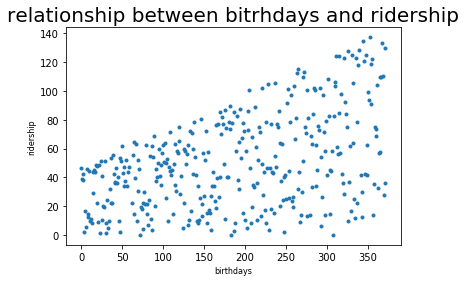

In [67]:
plt.plot(birthdays_2.index,birthdays_2.subway_ridership,'.')
plt.title('relationship between bitrhdays and ridership', fontsize=20)
plt.ylabel('ridership', fontsize=8)
plt.xlabel('birthdays', fontsize=8)

In [68]:
x=birthdays_2.index
y=birthdays_2.subway_ridership
X = np.array(x)
Y = np.array(y)
XY = X * Y

In [69]:
df = pd.DataFrame([X,Y,XY]).T
df.columns = ["x","y","xy"]
df.loc[:,"x_sqr"]=df.x*df.x

w1=(df.xy.sum()-df.y.sum()*df.x.sum()/len(df))/(df.x_sqr.sum()-df.x.sum()*df.x.sum()/len(df))
print("w1 is : {}".format(w1))

w0=(df.y-df.x*w1).mean()
print("w0 is : {}".format(w0))

df.loc[:,"pred"]=w1*df.x+w0
df.loc[:,"err"]=df.y-df.pred

R_2=1-(df.err**2).sum()/((df.y-df.y.mean())**2).sum()
print("R_2 is : {}".format(R_2))

w1 is : 0.13672206337
w0 is : 25.0062285523
R_2 is : 0.20661712862


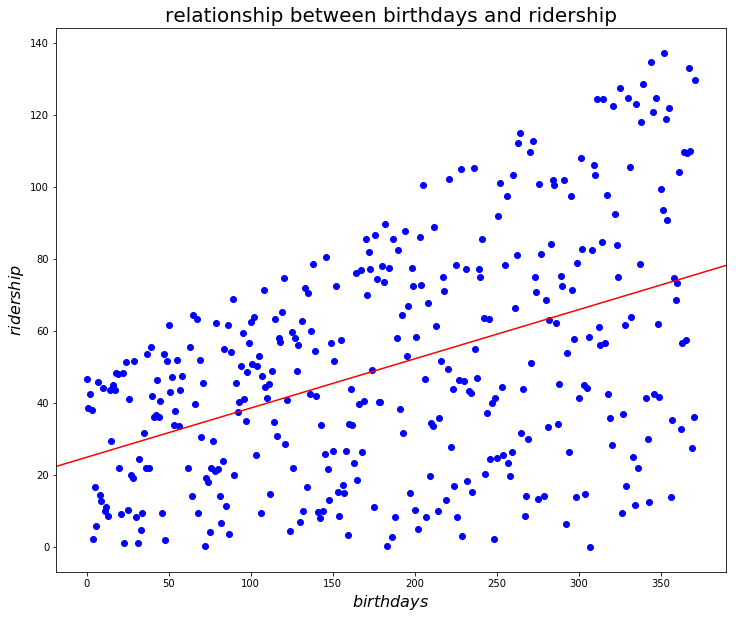

In [70]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import pandas as pd

x = pd.DataFrame(x)
y = pd.DataFrame(y)
data = pd.merge(x, y, left_index=True, right_index=True)
data.rename(columns={'X':'x', 'Y':'y'}, inplace=True)

figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, c='b')
lm = smf.ols(formula='y ~ x', data = df).fit()
abline_plot(model_results=lm, ax=ax, color='red')

plt.xlabel(r'$birthdays$', fontsize = 16)
plt.ylabel(r'$ridership$', fontsize = 16)
plt.title(r'relationship between birthdays and ridership', fontsize = 20)

3.3) Print the summary statistics of your regression and discuss if your results confirm or reject the null hypothesis at a p-value of 0.05. Discuss the possible implications of Type 1 & Type 2 errors and the choice of a 0.05 p-value. (15 points)

In [71]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     94.53
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           5.20e-20
Time:                        19:41:48   Log-Likelihood:                -1743.9
No. Observations:                 365   AIC:                             3492.
Df Residuals:                     363   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     25.0062      3.020      8.280      0.0

Because p=0.000<0.05, we reject the hypothesis at p=0.05.

the null hypothesis is: people born in the later half year tend to ride the subway more often
type 1 error: the hypothesis is true, people born later in the year tend to ride the subway more often, but we wrongfully reject the hypothesis and assume that people born later in the year don't tend to ride the subway more often

type 2 error: the hypothesis is false, people born later in the year don't tend to ride the subway more often, but we assume it is true